In [1]:
from Class_PINN_FBPINN import *
import matplotlib.pyplot as plt
import pickle

c:\Users\C097\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Running on  cuda


In [2]:
torch.cuda.is_available()

True

### Increasing number of subdomains and layers in PINN for multi-scale problem

In [23]:
# Parameters
domain = [-2*np.pi, 2*np.pi]


# w_list = [2, 4, 8, 16, 32]
w_list = [2, 4, 8]
n_multi_scale = len(w_list)
overlap = 0.3
sigma = 0.1
n_hidden_layers = 2
neurons = 32

#n_subdomains = 30

num_points = 200*15
# n_epochs = 10000
n_epochs = 50000

n_subdomains = [10,30,50,100]
# n_subdomains = [10, 30, 50, 100]

# n_subdomains = [1]

In [24]:
l1_loss_arr = []
l1_loss_min = []
loss_domains = []

In [26]:
def plot_solution(model, sub_domain):
    fig = plt.figure(figsize=(10, 5))
    # Plot the exact solution
    x = torch.linspace(domain[0], domain[1], num_points, dtype=torch.float32, device=DEVICE).reshape(-1, 1)
    u_exact = model.exact_solution(x)

    plt.plot(x.cpu().detach().numpy(), u_exact.cpu().detach().numpy(), label='Exact', color="blue")

    # Plot the FBPINN solution
    for i in range(model.n_subdomains):

        u_approx = torch.tanh(model.w_list[-1] * x) * model(x)  

        plt.plot(x.cpu().detach().numpy(), u_approx.cpu().detach().numpy(), color="green")
    # Add label only once
        if i == 0:
            plt.plot(x.cpu().detach().numpy(), u_approx.cpu().detach().numpy(), label='FBPINN', color="green")
            
    plt.title('FBPINN Nr subdomains: {}'.format(sub_domain))
    plt.legend()
    plt.xlabel(r'$x$')
    plt.ylabel(r'$u$')
    plt.savefig("fig_scaling/fig_{}_{}.pdf".format(len(w_list), sub_domain))
    plt.show()

Epoch :  0 	 Loss:  380.91900634765625 	 Epoch_time:  0  s
Epoch :  100 	 Loss:  36.02657699584961 	 Epoch_time:  0  s
Epoch :  200 	 Loss:  35.446327209472656 	 Epoch_time:  0  s
Epoch :  300 	 Loss:  35.05638885498047 	 Epoch_time:  0  s
Epoch :  400 	 Loss:  34.813873291015625 	 Epoch_time:  0  s
Epoch :  500 	 Loss:  34.67477798461914 	 Epoch_time:  0  s
Epoch :  600 	 Loss:  34.591880798339844 	 Epoch_time:  0  s
Epoch :  700 	 Loss:  34.53519058227539 	 Epoch_time:  0  s
Epoch :  800 	 Loss:  34.49171829223633 	 Epoch_time:  0  s
Epoch :  900 	 Loss:  34.45644760131836 	 Epoch_time:  0  s
Epoch :  1000 	 Loss:  34.42729568481445 	 Epoch_time:  0  s
Epoch :  1100 	 Loss:  34.402183532714844 	 Epoch_time:  0  s
Epoch :  1200 	 Loss:  34.379615783691406 	 Epoch_time:  0  s
Epoch :  1300 	 Loss:  34.3594856262207 	 Epoch_time:  0  s
Epoch :  1400 	 Loss:  34.339725494384766 	 Epoch_time:  0  s
Epoch :  1500 	 Loss:  34.31971740722656 	 Epoch_time:  0  s
Epoch :  1600 	 Loss:  34.2987

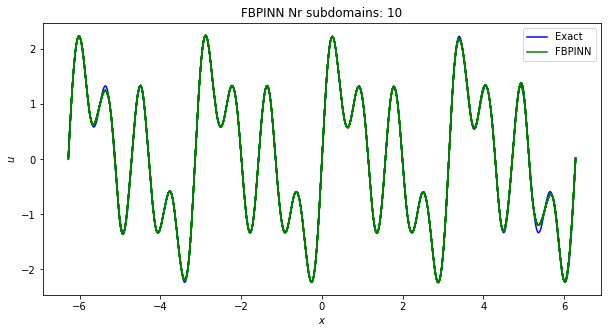

Epoch :  0 	 Loss:  390.5443420410156 	 Epoch_time:  0  s
Epoch :  100 	 Loss:  22.757165908813477 	 Epoch_time:  0  s
Epoch :  200 	 Loss:  19.700546264648438 	 Epoch_time:  0  s
Epoch :  300 	 Loss:  16.206802368164062 	 Epoch_time:  0  s
Epoch :  400 	 Loss:  12.675963401794434 	 Epoch_time:  0  s
Epoch :  500 	 Loss:  9.505037307739258 	 Epoch_time:  0  s
Epoch :  600 	 Loss:  6.951250076293945 	 Epoch_time:  0  s
Epoch :  700 	 Loss:  5.1235761642456055 	 Epoch_time:  0  s
Epoch :  800 	 Loss:  3.818117141723633 	 Epoch_time:  0  s
Epoch :  900 	 Loss:  2.7671263217926025 	 Epoch_time:  0  s
Epoch :  1000 	 Loss:  1.921501874923706 	 Epoch_time:  0  s
Epoch :  1100 	 Loss:  1.3550511598587036 	 Epoch_time:  0  s
Epoch :  1200 	 Loss:  1.041292667388916 	 Epoch_time:  0  s
Epoch :  1300 	 Loss:  0.873772144317627 	 Epoch_time:  0  s
Epoch :  1400 	 Loss:  0.7775739431381226 	 Epoch_time:  0  s
Epoch :  1500 	 Loss:  0.7182661294937134 	 Epoch_time:  0  s
Epoch :  1600 	 Loss:  0.67

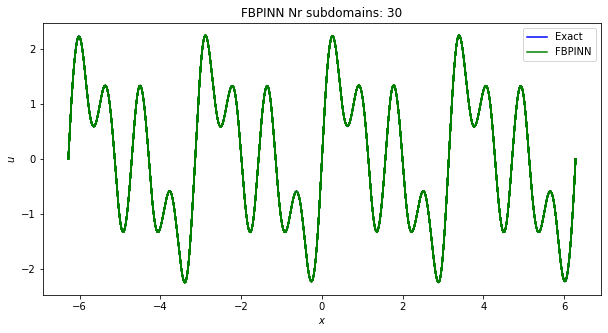

Epoch :  0 	 Loss:  455.237548828125 	 Epoch_time:  0  s
Epoch :  100 	 Loss:  2.4641170501708984 	 Epoch_time:  0  s
Epoch :  200 	 Loss:  2.017780065536499 	 Epoch_time:  0  s
Epoch :  300 	 Loss:  1.8256688117980957 	 Epoch_time:  0  s
Epoch :  400 	 Loss:  1.7301793098449707 	 Epoch_time:  0  s
Epoch :  500 	 Loss:  1.6555445194244385 	 Epoch_time:  0  s
Epoch :  600 	 Loss:  1.574309229850769 	 Epoch_time:  0  s
Epoch :  700 	 Loss:  1.4757587909698486 	 Epoch_time:  0  s
Epoch :  800 	 Loss:  1.3528274297714233 	 Epoch_time:  0  s
Epoch :  900 	 Loss:  1.2029868364334106 	 Epoch_time:  0  s
Epoch :  1000 	 Loss:  1.0290145874023438 	 Epoch_time:  0  s
Epoch :  1100 	 Loss:  0.8441668152809143 	 Epoch_time:  0  s
Epoch :  1200 	 Loss:  0.6737487316131592 	 Epoch_time:  0  s
Epoch :  1300 	 Loss:  0.5436221361160278 	 Epoch_time:  0  s
Epoch :  1400 	 Loss:  0.4624132513999939 	 Epoch_time:  0  s
Epoch :  1500 	 Loss:  0.41862401366233826 	 Epoch_time:  0  s
Epoch :  1600 	 Loss:  

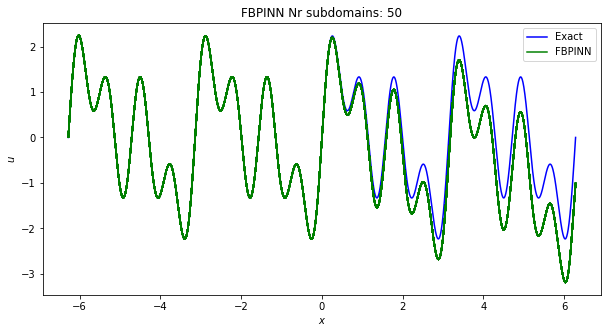

Epoch :  0 	 Loss:  721.0436401367188 	 Epoch_time:  0  s
Epoch :  100 	 Loss:  0.5013250112533569 	 Epoch_time:  0  s
Epoch :  200 	 Loss:  0.2443576604127884 	 Epoch_time:  0  s
Epoch :  300 	 Loss:  0.14818508923053741 	 Epoch_time:  0  s
Epoch :  400 	 Loss:  0.11093072593212128 	 Epoch_time:  0  s
Epoch :  500 	 Loss:  0.09598113596439362 	 Epoch_time:  0  s
Epoch :  600 	 Loss:  0.0898078978061676 	 Epoch_time:  0  s
Epoch :  700 	 Loss:  0.08733560144901276 	 Epoch_time:  0  s
Epoch :  800 	 Loss:  0.08634068816900253 	 Epoch_time:  0  s
Epoch :  900 	 Loss:  0.08586663752794266 	 Epoch_time:  0  s
Epoch :  1000 	 Loss:  0.08562491834163666 	 Epoch_time:  0  s
Epoch :  1100 	 Loss:  0.08545971661806107 	 Epoch_time:  0  s
Epoch :  1200 	 Loss:  0.08527153730392456 	 Epoch_time:  0  s
Epoch :  1300 	 Loss:  0.08509796857833862 	 Epoch_time:  0  s
Epoch :  1400 	 Loss:  0.08494989573955536 	 Epoch_time:  0  s
Epoch :  1500 	 Loss:  0.08479069918394089 	 Epoch_time:  0  s
Epoch :  

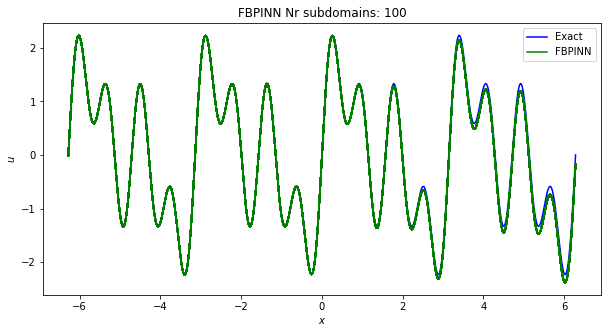

In [27]:
for nr_sub in n_subdomains:

    # Create the model
    model = FBPINN_Cos_nD(domain_extrema=domain, n_subdomains=nr_sub, overlap=overlap, sigma=sigma, n_hidden_layers=n_hidden_layers, neurons=neurons, activation_function=nn.Tanh(), n_multi_scale=n_multi_scale, w_list=w_list)

    # Train the FBPINN
    # model.to(mps_device)
    history, l1_loss = model.fit(num_points, n_epochs, verbose=True)

    l1_loss_arr.append(l1_loss)

    print("Loss: {}".format(np.min(l1_loss)))

    l1_loss_min.append(np.min(l1_loss))

    plot_solution(model, nr_sub)

    torch.save(model.state_dict(), 'models_save/scale_fbpinn_{}_{}.pdh'.format(len(w_list), nr_sub))

    # Save the l1 loss in pickle
    with open("l1_loss_scale_fbpinn_{}_{}".format(len(w_list), nr_sub), 'wb') as file:
        pickle.dump(l1_loss, file)

#### Multi-Case 5

In [49]:
# Parameters
domain = [-2*np.pi, 2*np.pi]


w_list = [2, 4, 8, 16, 32]
# w_list = [2, 4, 8]
n_multi_scale = len(w_list)
overlap = 0.2
sigma = 0.1
n_hidden_layers = 2
neurons = 32

#n_subdomains = 30

num_points = 200*15
# n_epochs = 10000
n_epochs = 50000

# n_subdomains = [10,30,50,100]
n_subdomains = [10,20,30,40]

In [50]:
l1_loss_arr_2 = []
l1_loss_min_2= []
loss_domains_2 = []

Epoch :  0 	 Loss:  1625.3043212890625 	 Epoch_time:  0  s
Epoch :  100 	 Loss:  659.6221313476562 	 Epoch_time:  0  s
Epoch :  200 	 Loss:  658.9071655273438 	 Epoch_time:  0  s
Epoch :  300 	 Loss:  658.5191040039062 	 Epoch_time:  0  s
Epoch :  400 	 Loss:  658.2677612304688 	 Epoch_time:  0  s
Epoch :  500 	 Loss:  658.103271484375 	 Epoch_time:  0  s
Epoch :  600 	 Loss:  658.0022583007812 	 Epoch_time:  0  s
Epoch :  700 	 Loss:  657.934814453125 	 Epoch_time:  0  s
Epoch :  800 	 Loss:  657.88818359375 	 Epoch_time:  0  s
Epoch :  900 	 Loss:  657.8523559570312 	 Epoch_time:  0  s
Epoch :  1000 	 Loss:  657.8289794921875 	 Epoch_time:  0  s
Epoch :  1100 	 Loss:  657.8081665039062 	 Epoch_time:  0  s
Epoch :  1200 	 Loss:  657.7916870117188 	 Epoch_time:  0  s
Epoch :  1300 	 Loss:  657.7803344726562 	 Epoch_time:  0  s
Epoch :  1400 	 Loss:  657.7691650390625 	 Epoch_time:  0  s
Epoch :  1500 	 Loss:  657.7623901367188 	 Epoch_time:  0  s
Epoch :  1600 	 Loss:  657.755920410156

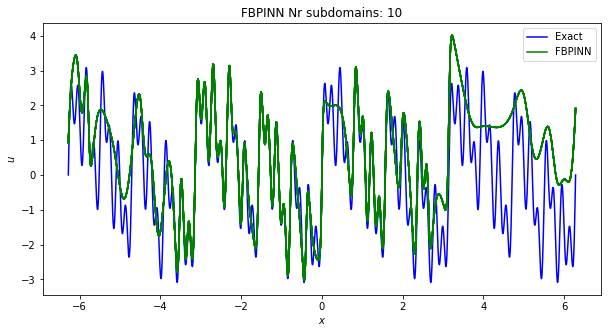

Epoch :  0 	 Loss:  1628.3660888671875 	 Epoch_time:  0  s
Epoch :  100 	 Loss:  648.051513671875 	 Epoch_time:  0  s
Epoch :  200 	 Loss:  646.3968505859375 	 Epoch_time:  0  s
Epoch :  300 	 Loss:  644.7953491210938 	 Epoch_time:  0  s
Epoch :  400 	 Loss:  643.3286743164062 	 Epoch_time:  0  s
Epoch :  500 	 Loss:  641.9624633789062 	 Epoch_time:  0  s
Epoch :  600 	 Loss:  640.591552734375 	 Epoch_time:  0  s
Epoch :  700 	 Loss:  639.1934814453125 	 Epoch_time:  0  s
Epoch :  800 	 Loss:  637.7965698242188 	 Epoch_time:  0  s
Epoch :  900 	 Loss:  636.4497680664062 	 Epoch_time:  0  s
Epoch :  1000 	 Loss:  635.2323608398438 	 Epoch_time:  0  s
Epoch :  1100 	 Loss:  634.2432250976562 	 Epoch_time:  0  s
Epoch :  1200 	 Loss:  633.5332641601562 	 Epoch_time:  0  s
Epoch :  1300 	 Loss:  633.078857421875 	 Epoch_time:  0  s
Epoch :  1400 	 Loss:  632.7987670898438 	 Epoch_time:  0  s
Epoch :  1500 	 Loss:  632.6280517578125 	 Epoch_time:  0  s
Epoch :  1600 	 Loss:  632.51110839843

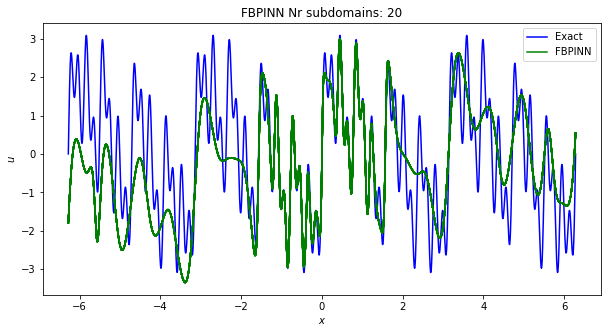

Epoch :  0 	 Loss:  1652.0706787109375 	 Epoch_time:  0  s
Epoch :  100 	 Loss:  647.5870971679688 	 Epoch_time:  0  s
Epoch :  200 	 Loss:  644.4273681640625 	 Epoch_time:  0  s
Epoch :  300 	 Loss:  641.0768432617188 	 Epoch_time:  0  s
Epoch :  400 	 Loss:  637.8399658203125 	 Epoch_time:  0  s
Epoch :  500 	 Loss:  634.8873291015625 	 Epoch_time:  0  s
Epoch :  600 	 Loss:  632.2984619140625 	 Epoch_time:  0  s
Epoch :  700 	 Loss:  630.11865234375 	 Epoch_time:  0  s
Epoch :  800 	 Loss:  628.3379516601562 	 Epoch_time:  0  s
Epoch :  900 	 Loss:  626.8992309570312 	 Epoch_time:  0  s
Epoch :  1000 	 Loss:  625.7408447265625 	 Epoch_time:  0  s
Epoch :  1100 	 Loss:  624.7881469726562 	 Epoch_time:  0  s
Epoch :  1200 	 Loss:  624.0048828125 	 Epoch_time:  0  s
Epoch :  1300 	 Loss:  623.3746337890625 	 Epoch_time:  0  s
Epoch :  1400 	 Loss:  622.8731689453125 	 Epoch_time:  0  s
Epoch :  1500 	 Loss:  622.4580078125 	 Epoch_time:  0  s
Epoch :  1600 	 Loss:  622.1014404296875 	 

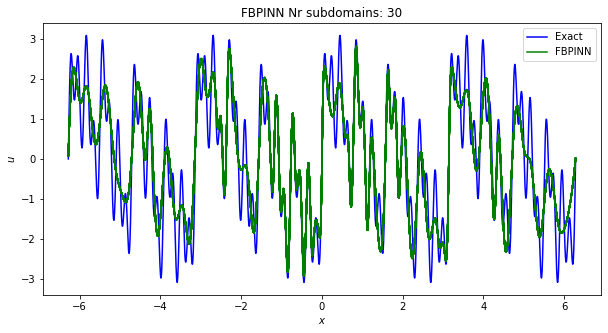

Epoch :  0 	 Loss:  1706.9974365234375 	 Epoch_time:  0  s
Epoch :  100 	 Loss:  628.1527709960938 	 Epoch_time:  0  s
Epoch :  200 	 Loss:  625.4129638671875 	 Epoch_time:  0  s
Epoch :  300 	 Loss:  622.0193481445312 	 Epoch_time:  0  s
Epoch :  400 	 Loss:  619.1041259765625 	 Epoch_time:  0  s
Epoch :  500 	 Loss:  616.2984619140625 	 Epoch_time:  0  s
Epoch :  600 	 Loss:  613.3875122070312 	 Epoch_time:  0  s
Epoch :  700 	 Loss:  610.4225463867188 	 Epoch_time:  0  s
Epoch :  800 	 Loss:  607.0308227539062 	 Epoch_time:  0  s
Epoch :  900 	 Loss:  602.5043334960938 	 Epoch_time:  0  s
Epoch :  1000 	 Loss:  596.4024047851562 	 Epoch_time:  0  s
Epoch :  1100 	 Loss:  589.73291015625 	 Epoch_time:  0  s
Epoch :  1200 	 Loss:  583.4991455078125 	 Epoch_time:  0  s
Epoch :  1300 	 Loss:  578.0198974609375 	 Epoch_time:  0  s
Epoch :  1400 	 Loss:  573.2139282226562 	 Epoch_time:  0  s
Epoch :  1500 	 Loss:  568.325927734375 	 Epoch_time:  0  s
Epoch :  1600 	 Loss:  563.86767578125

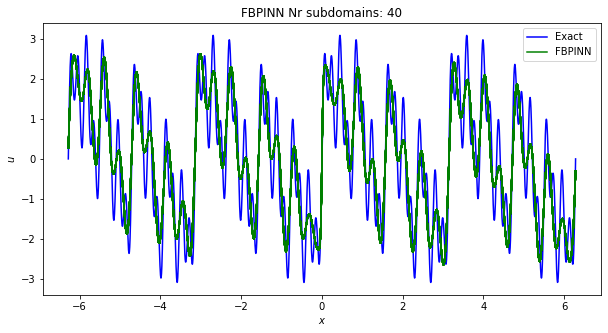

In [51]:
for nr_sub in n_subdomains:

    # Create the model
    model = FBPINN_Cos_nD(domain_extrema=domain, n_subdomains=nr_sub, overlap=overlap, sigma=sigma, n_hidden_layers=n_hidden_layers, neurons=neurons, activation_function=nn.Tanh(), n_multi_scale=n_multi_scale, w_list=w_list)

    # Train the FBPINN
    # model.to(mps_device)
    history, l1_loss = model.fit(num_points, n_epochs, verbose=True)

    l1_loss_arr_2.append(l1_loss)

    print("Loss: {}".format(np.min(l1_loss)))

    l1_loss_min_2.append(np.min(l1_loss))

    plot_solution(model, nr_sub)

    torch.save(model.state_dict(), 'models_save/scale_fbpinn_{}_{}.pdh'.format(len(w_list), nr_sub))

    # Save the l1 loss in pickle
    with open("l1_loss_scale_fbpinn_{}_{}".format(len(w_list), nr_sub), 'wb') as file:
        pickle.dump(l1_loss, file)

### Computional Cost

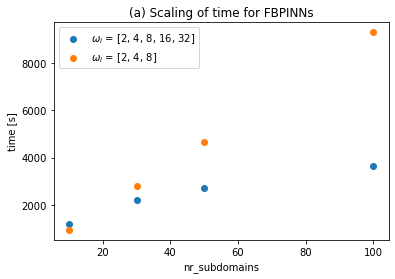

In [11]:
# [20  min  13  s, 36  min  45  s, 45  min  25  s , '60  min  39  s']
# [15  min  45  s, 46  min  50  s,  77  min  47,  154  min  53  s]

x = n_subdomains

x_2 = [10,30,50,100]

times_5 = [1213, 2205, 2725, 3639]
times_3 = [945, 2810, 4667, 9293]

fig = plt.figure(figsize= (6, 4))

# plt.scatter(x, l1_loss_min, alpha = 1, label = r'$\omega_i$ = [2, 4, 8]')
plt.scatter(x, times_5, alpha = 1, label = r'$\omega_i$ = [2, 4, 8, 16, 32]')
plt.scatter(x_2, times_3, alpha = 1, label = r'$\omega_i$ = [2, 4, 8]')
plt.legend()
plt.title(r'(a) Scaling of time for FBPINNs')
# plt.yscale('log')
plt.xlabel('nr_subdomains')
plt.ylabel(r"time [s]")
plt.savefig("time_scatter_fbpinn.pdf")
plt.show()

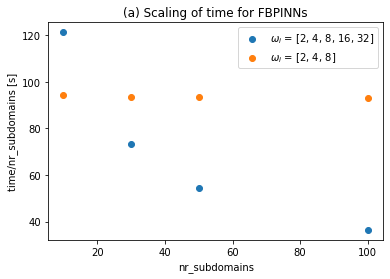

In [10]:
x = n_subdomains

x_2 = [10,30,50,100]

times_5 = [1213, 2205, 2725, 3639]
times_3 = [945, 2810, 4667, 9293]

res1 = [i / j for i, j in zip(times_5, x)]
res2 =[i / j for i, j in zip(times_3, x_2)] 

fig = plt.figure(figsize= (6, 4))

# plt.scatter(x, l1_loss_min, alpha = 1, label = r'$\omega_i$ = [2, 4, 8]')
plt.scatter(x, res1, alpha = 1, label = r'$\omega_i$ = [2, 4, 8, 16, 32]')
plt.scatter(x_2, res2, alpha = 1, label = r'$\omega_i$ = [2, 4, 8]')
plt.legend()
plt.title(r'(a) Scaling of time for FBPINNs')
# plt.yscale('log')
plt.xlabel('nr_subdomains')
plt.ylabel(r"time/nr_subdomains [s]")
plt.savefig("time_scatter_scaled_fbpinn.pdf")
plt.show()

### L_1 Loss evolution

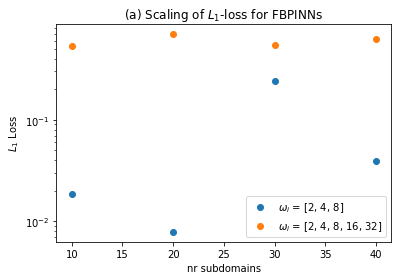

In [63]:
x = n_subdomains

fig = plt.figure(figsize= (6, 4))

plt.scatter(x, l1_loss_min, alpha = 1, label = r'$\omega_i$ = [2, 4, 8]')
plt.scatter(x, l1_loss_min_2, alpha = 1, label = r'$\omega_i$ = [2, 4, 8, 16, 32]')
plt.legend()
plt.title(r'(a) Scaling of $L_1$-loss for FBPINNs')
plt.yscale('log')
plt.xlabel('nr_subdomains')
plt.ylabel(r"$L_1$ Loss")
plt.savefig("l1_loss_scatter_fbpinn.pdf")
plt.show()